# CPS 840 / CP 8318
# Assignment 1 - Matthew Kowal - 500884938
## Part 1 [20 Marks]

[6 Marks] 
# a

Write a simple implementation of a least-squares solution to linear regression that applies an iterative update to adjust the weights. Demonstrate the success of your approach on the sample data loaded below, and visualize the best fit plotted as a line (consider using linspace) against a scatter plot of the x and y test values.


In [1]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

slope is: 734.239
intercept is:147.617


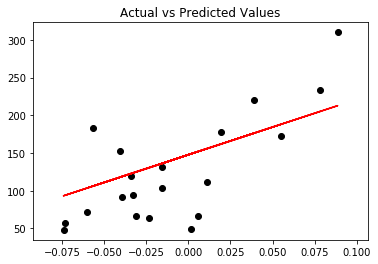

In [2]:
# YOUR CODE HERE #######

#Linear regression model with gradient descent
def linear_regression(X, y, m_current=0, b_current=0, learning_rate=0.8):
    N = float(len(y))
    for i in range(X.size):
        y_current = (m_current * X[i]) + b_current
        loss = (y[i]-y_current)
        m_gradient = -2 * np.sum(X[i] * loss)
        b_gradient = -2 * np.sum(loss)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
    return m_current, b_current

m, b  = linear_regression(diabetes_X_train, diabetes_y_train)

line = m*diabetes_X_test+b

print("slope is: %.3f"% m)
print("intercept is:%.3f"%  b)


plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, line, color='red')
plt.title('Actual vs Predicted Values')
plt.show()


[2 Marks]
# b

Load data on movie ratings, revenue, metadata etc. Split data into a relevant set for training, testing and classification. Explain your choice of split. It is ok if you decide to split into these subsets after part c -> if you do so, mention this at the end of your explanation.

Explanation: I split the total number of movies (after cleanup) into 85% training, 10% testing, and 5% classification. (this is done after part c) ***


In [3]:
### An example to load a csv file
import pandas as pd 
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MultiLabelBinarizer
from ast import literal_eval
meta_data=pd.read_csv('movies_metadata.csv', low_memory=False) # You may wish to specify types, or process columns once read
ratings_small=pd.read_csv('ratings_small.csv')
import warnings; warnings.simplefilter('ignore')

#removing the undesired features
features = ['adult', 'budget', 'genres','original_title','popularity','release_date','revenue','runtime','vote_average','vote_count']
meta_data_features = meta_data[features]


#Removing excess strings from cells
meta_data_features['genres'] = meta_data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else[])
meta_data_features['release_date'] = pd.to_datetime(meta_data['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

'''meta_data_features['production_companies'] = meta_data_features['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else[])
meta_data_features['production_countries'] = meta_data_features['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else[])
'''

meta_data_features.head()

,adult,budget,genres,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count
0,False,30000000,"[Animation, Comedy, Family]",Toy Story,21.946943,1995,373554033.0,81.0,7.7,5415.0
1,False,65000000,"[Adventure, Fantasy, Family]",Jumanji,17.015539,1995,262797249.0,104.0,6.9,2413.0
2,False,0,"[Romance, Comedy]",Grumpier Old Men,11.7129,1995,0.0,101.0,6.5,92.0
3,False,16000000,"[Comedy, Drama, Romance]",Waiting to Exhale,3.859495,1995,81452156.0,127.0,6.1,34.0
4,False,0,[Comedy],Father of the Bride Part II,8.387519,1995,76578911.0,106.0,5.7,173.0


One hot encoding code

In [4]:
def one_hot_encoding(df, col):
    mlb = MultiLabelBinarizer()
    
    df_temp = df[col]
    df_temp = mlb.fit_transform(df_temp)
    
    encoded_df = pd.DataFrame(df_temp, columns=mlb.classes_)
    encoded_df = pd.get_dummies(encoded_df)
    
    
    encoded_df = pd.DataFrame(encoded_df)
    
    df = df.drop(columns=[col])  
    df = pd.merge(encoded_df, df, right_index=True, left_index=True)
    
    return df
   
meta_data_features = one_hot_encoding(meta_data_features, 'genres')

meta_data_features.head()

,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,...,Western,adult,budget,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count
0,0,0,1,0,0,0,1,0,0,0,...,0,False,30000000,Toy Story,21.946943,1995,373554033.0,81.0,7.7,5415.0
1,0,1,0,0,0,0,0,0,0,0,...,0,False,65000000,Jumanji,17.015539,1995,262797249.0,104.0,6.9,2413.0
2,0,0,0,0,0,0,1,0,0,0,...,0,False,0,Grumpier Old Men,11.7129,1995,0.0,101.0,6.5,92.0
3,0,0,0,0,0,0,1,0,0,1,...,0,False,16000000,Waiting to Exhale,3.859495,1995,81452156.0,127.0,6.1,34.0
4,0,0,0,0,0,0,1,0,0,0,...,0,False,0,Father of the Bride Part II,8.387519,1995,76578911.0,106.0,5.7,173.0


[5 Marks]
# c

Organize the data into relevant features for predicting revenue. <br>
i.  Explain your feature sets and organization. <br>

Features that could effect revenue should be included, as well as the movie name:

---- Title,
Adult (limits amount of people who can purchase and see the movie),
Budget (determines actors, special effects, location of shooting...)
Genres (some genres are more popular than others),
Popularity (you would expect movies to be watched more if they are popular),
Release date (release date could have effect on popularity during that time),
Runtime (people may enjoy different lengths of movies),
Vote average (shows general consensus about the movie from public),
Vote count (shows the portion of the people who watched the movie),
Year (can effect revenue due to popularity of movies/ genres at the time as well as inflation of currencies),
Revenue ----

Some of the features have been removed due to difficulty of manipulation as well as computational recources. For instance, I removed the 'spoken_languages' column because one-hot-encoding it turns the dataset into one with thousands features. This results in the features being too sparse to have good prediction values. It is possible it would work better if there were more movie examples to work with.

ii. Plot movie revenue vs. rating as a scatter plot and discuss your findings. <br>

You can see that the distribution of ratings looks like a gaussian distribution with a mean around 7. However the average movie rating is 6.4. It should also be noted that the number of voters increasing will converge the rating to the true value (the average rating that all people rate that movie) and that multiple movies have very low vote_count values. This will increase the variance of move ratings for those movies. E.g. a movie with 4 voters who all voted 10/10 will have a higher rating than a movie with 5000 voters with an average vote of 9.5, even though it is much more likely that the 9.5 rated movie will have a higher vote average as the number of voters increase.

iii. Visualize any other relationships you deem interesting and explain. <br>

The revenue vs runtime plot clearly shows nearly all movies which make a substantial amount of revenue are between 70 minutes to 200 minutes long. 

The revenue vs budget plot has a line of slope 1 on it. All points above this line are movies that profited, and all the points below this line are movies that lost money. Clearly, the vast majority of movies profited. You can also see that many movies are capped at $1.5, $2, and $2.5 million.



In [5]:
#meta_data.head()
# The following line is one way of cleaning up the genres field - there are more verbose ways of doing this that are easier for a human to read
#meta_data['genres'] = meta_data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else[])
#meta_data['year'] = pd.to_datetime(meta_data['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
#meta_data.head()
# Consider how the columns look before and after this 'clean-up' - it is very common to have to massage the data to get the right features

##### YOUR CODE HERE ######

#More feature Cleanup

#Converting features to correct object types and removing outliers
meta_data_features['budget'] = pd.to_numeric(meta_data_features['budget'], errors='coerce')
meta_data_features['budget'] = meta_data_features['budget'].apply(lambda x: np.nan if x < 1000 else x)

meta_data_features['revenue'] = pd.to_numeric(meta_data_features['revenue'], errors='coerce')
meta_data_features['revenue'] = meta_data_features['revenue'].apply(lambda x: np.nan if x < 1000 else x)

meta_data_features['vote_count'] = pd.to_numeric(meta_data_features['vote_count'], errors='coerce')
meta_data_features['vote_count'] = meta_data_features['vote_count'].apply(lambda x: np.nan if x < 100 else x)

# Converting features to numeric values
meta_data_features['adult'] = meta_data_features['adult'].apply(lambda x: 1 if x == True else 0)

'''
meta_data_features['production_companies'] = meta_data_features['production_companies'].apply(lambda col: pd.factorize(col, sort=True)[0])
meta_data_features['production_countries'] = meta_data_features['production_countries'].apply(lambda col: pd.factorize(col, sort=True)[0])
meta_data_features['genres'] = meta_data_features['genres'].apply(lambda col: pd.factorize(col, sort=True)[0])
meta_data_features['spoken_languages'] = meta_data_features['spoken_languages'].apply(lambda col: pd.factorize(col, sort=True)[0])
'''

#Dropping all rows with NaN objects
meta_data_features.dropna(subset=['adult', 'budget','original_title','popularity','release_date','revenue','runtime','vote_average','vote_count'],inplace = True)
meta_data_features.head()

,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,...,Western,adult,budget,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count
0,0,0,1,0,0,0,1,0,0,0,...,0,0,30000000.0,Toy Story,21.946943,1995,373554033.0,81.0,7.7,5415.0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,65000000.0,Jumanji,17.015539,1995,262797249.0,104.0,6.9,2413.0
5,1,0,0,0,0,0,0,1,0,1,...,0,0,60000000.0,Heat,17.924927,1995,187436818.0,170.0,7.7,1886.0
8,1,1,0,0,0,0,0,0,0,0,...,0,0,35000000.0,Sudden Death,5.23158,1995,64350171.0,106.0,5.5,174.0
9,1,1,0,0,0,0,0,0,0,0,...,0,0,58000000.0,GoldenEye,14.686036,1995,352194034.0,130.0,6.6,1194.0


In [6]:
#Check how many examples are left after cleaning
meta_data_features.shape

(3788, 41)

In [7]:
#Shuffling the data and then splitting the data into training, testing and validation sets (85%, 10%, 5%)
# 85%, 10% and 5% of 3788 is 3220, 379, 189 respectively


shuffled_data = shuffle(meta_data_features).reset_index(drop=True)

#Take revenue from data for y-values
movie_y_train = shuffled_data['revenue'][:-568]
movie_y_test = shuffled_data['revenue'][3221:3599]
movie_y_val = shuffled_data['revenue'][3599:]


#Remove revenue and title for the predictive features
shuffled_data = shuffled_data.drop(columns = ['original_title','revenue'])

#Sorting data into x-values
movie_x_train = shuffled_data[:-568]
movie_x_test = shuffled_data[3221:3599]
movie_x_val = shuffled_data[3599:]


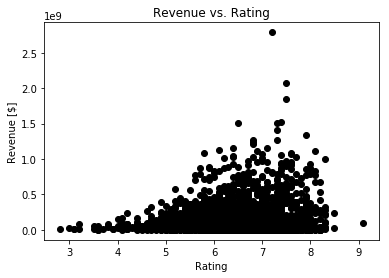

The average movie rating is: 6.406


In [8]:
# Plotting revenue vs rating
plt.scatter(meta_data_features['vote_average'], meta_data_features['revenue'], color='black')
plt.title('Revenue vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Revenue [$]')
plt.show()

print('The average movie rating is: %.3f' % meta_data_features['vote_average'].mean())

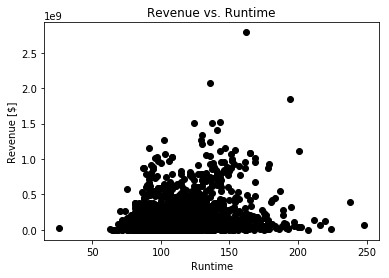

In [9]:
#Other interesting plots
plt.scatter(meta_data_features['runtime'], meta_data_features['revenue'], color='black')
plt.title('Revenue vs. Runtime')
plt.xlabel('Runtime')
plt.ylabel('Revenue [$]')
plt.show()

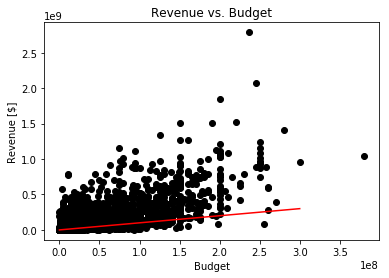

In [10]:
#Plotting revenue vs budget
plt.scatter(meta_data_features['budget'], meta_data_features['revenue'], color='black')
plt.title('Revenue vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue [$]')
plt.plot([0,3e8], [0,3e8], color='red')
plt.show()

[3 Marks]
# d

Train a regression model to predict movie revenue. Plot predicted revenue vs. actual revenue on the test set. Quantify the error in your prediction. (You may use sklearn for this step)

coefficients: 
 [-6.34513187e+06  1.40332905e+07  2.93086169e+07 -1.30039025e-02
  8.49222504e-02 -6.14153203e-02  9.84082057e+06 -1.35241441e+07
  4.20481727e+07 -1.10277987e+07  2.41447041e+07 -2.29385381e+06
  4.84040491e-02 -3.23890181e-01 -1.35211739e+07  1.22469904e+07
 -1.43415928e-02  8.82680427e+06 -5.76296613e+06 -3.72529030e-09
  0.00000000e+00  0.00000000e+00  1.87543608e+07 -3.99539764e+07
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.15879711e+06  0.00000000e+00 -1.33305647e+07 -6.67556327e+07
  0.00000000e+00  1.83883427e+00  1.04360996e+06 -9.61212859e+05
  3.33385569e+05 -5.22460484e+06  6.62228545e+04]
mean squared error: 8418939448397342
Variance: 0.722


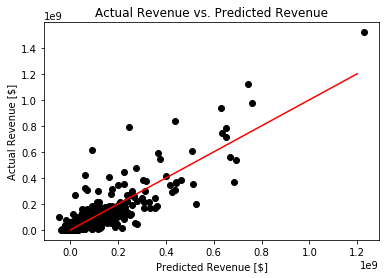

In [11]:
# Regression model here, plot your fit to the revenue data versus the actual data from the test set as a scatter plot.
##### YOUR CODE HERE #######
from sklearn.linear_model import LinearRegression

reg = linear_model.LinearRegression()

#Fitting and predicting revenue from the features
reg.fit(movie_x_train, movie_y_train)
predicted_revenue = reg.predict(movie_x_test)


print('coefficients: \n', reg.coef_)
print("mean squared error: %.f" % mean_squared_error(movie_y_test, predicted_revenue))
print('Variance: %.3f' % r2_score(movie_y_test, predicted_revenue))

#Plotting actual revenue vs predicted revenue
plt.scatter(predicted_revenue, movie_y_test, color='black')
plt.title('Actual Revenue vs. Predicted Revenue')
plt.xlabel('Predicted Revenue [$]')
plt.ylabel('Actual Revenue [$]')

#Plotting the perfect prediction line (y=x)
plt.plot([0,1.2e9], [0,1.2e9], color='red')
plt.show()

[4 Marks]
# e

Try a non-linear fit to the data, with and without regularization. Find your best fit and justify the choice of parameters, regularization constant and norm. Plot predicted revenue vs. actual revenue on the test set. In each case, quantify the error. (See e.g. Generalized linear models, Kernel Ridge regression, SVR and others from sklearn)



mean squared error: 10614781882967520
r-squared coeficient: 0.648941


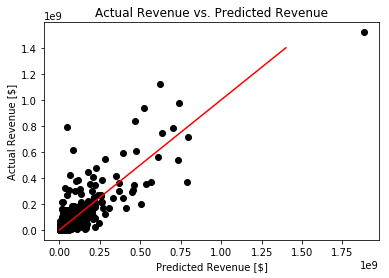

In [15]:
##### YOUR CODE HERE WITHOUT REGULARIZATION #######
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Alpha is the regularization term
#2-Poly features works much better than 3-Poly features (3 poly features appears to overfit the data)
non_linear = make_pipeline(PolynomialFeatures(2), KernelRidge(alpha=0))
non_linear.fit(movie_x_train, movie_y_train)
predicted_revenue_nonlinear = non_linear.predict(movie_x_test)

#print('parameters: \n', non_linear.get_params())
print("mean squared error: %.f" % mean_squared_error(movie_y_test, predicted_revenue_nonlinear))
print('r-squared coeficient: %.6f' % non_linear.score(movie_x_test, movie_y_test))


#Plotting actual revenue vs predicted revenue
plt.scatter(predicted_revenue_nonlinear, movie_y_test, color='black')
plt.title('Actual Revenue vs. Predicted Revenue')
plt.xlabel('Predicted Revenue [$]')
plt.ylabel('Actual Revenue [$]')

#Plotting the perfect prediction line (y=x)
plt.plot([0,1.4e9], [0,1.4e9], color='red')
plt.show()

mean squared error: 8012261884008261
r-squared coeficient: 0.735013


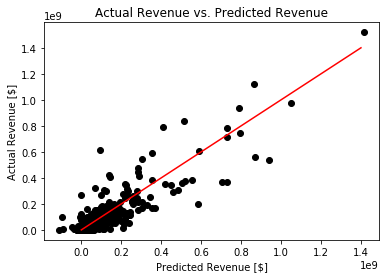

In [13]:
##### YOUR CODE HERE WITH REGULARIZATION #######
#I conducted a gridsearch mechanically because the code runds so fast. Alpha = 1.25 achieves better accuracy than 1.2 or 1.3
non_linear_reg = make_pipeline(PolynomialFeatures(2), Ridge(alpha=1.25))
non_linear_reg.fit(movie_x_train, movie_y_train)
predicted_revenue_nonlinear_reg = non_linear_reg.predict(movie_x_test)

#print('parameters: \n', non_linear_reg.get_params())
print("mean squared error: %.f" % mean_squared_error(movie_y_test, predicted_revenue_nonlinear_reg))
print('r-squared coeficient: %.6f' % non_linear_reg.score(movie_x_test, movie_y_test))


#Plotting actual revenue vs predicted revenue
plt.scatter(predicted_revenue_nonlinear_reg, movie_y_test, color='black')
plt.title('Actual Revenue vs. Predicted Revenue')
plt.xlabel('Predicted Revenue [$]')
plt.ylabel('Actual Revenue [$]')

#Plotting the perfect prediction line (y=x)
plt.plot([0,1.4e9], [0,1.4e9], color='red')
plt.show()


## Part 2 [10 Marks]

[4 Marks]
# a

Write a simple version of the basic algorithm for k-means clustering. Simple here means the core of the algorithm and not optimizations or extensions you might find in standard python libraries. Typically you might rely on a standard library for doing this, but it helps to see the core by manipulating the data and labels by hand as practice for numerical python and how to frame the algorithm.

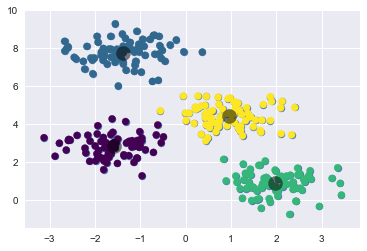

In [5]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np


# Generate Samples
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

###############################################
# YOUR CODE GOES HERE
# Put some code to find clusters here
# Assign the clusters and labels in your code

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_

###############################################




#Uncomment to display clusters and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

<a id="data set"></a>
[6 Marks]
# b

Load the mystery data below, and cluster the data (you don't need to use your code from part a). Visualize the data including assigned cluster labels.

In [6]:
# Load the mystery data here and cluster using k-means (now you can use libraries e.g. sklearn)
mystery = np.load('mystery.npy')

#Checking the shape of the data
mystery.shape

(30309, 784)

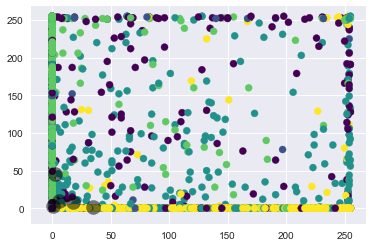

In [4]:
# Find a way to visualize the data (e.g. in 2D or 3D), color datapoints based on assigned labels.
k_mystery = KMeans(n_clusters=5)
k_mystery.fit(mystery)
mystery_labels = k_mystery.predict(mystery)
mystery_centers = k_mystery.cluster_centers_


#Attempting to visualize the data
plt.scatter(mystery[:, 0], mystery[:, 1], c=mystery_labels, s=50, cmap='viridis');
plt.scatter(mystery_centers[:, 0], mystery_centers[:, 1], c='black', s=200, alpha=0.5);

The same visualization method as before does not work. I will use PCA to reduce the components and then visualize.

[0 2 1 ... 0 1 0]


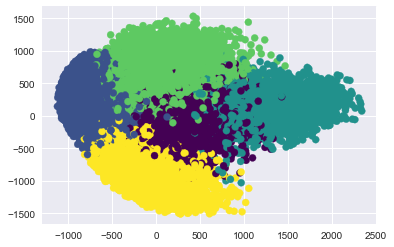

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(mystery)
trans_mystery = pca.transform(mystery)
trans_mystery.shape

print(mystery_labels)
plt.scatter(trans_mystery[:, 0], trans_mystery[:, 1], c=mystery_labels, s=50, cmap='viridis');

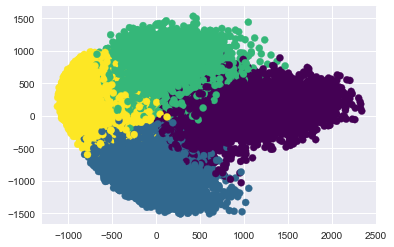

In [69]:
#Checking 4 cluster plot
k_mystery = KMeans(n_clusters=4)
k_mystery.fit(mystery)
mystery_labels = k_mystery.predict(mystery)
mystery_centers = k_mystery.cluster_centers_

pca = PCA(n_components = 2)
pca.fit(mystery)
trans_mystery = pca.transform(mystery)
trans_mystery.shape

plt.scatter(trans_mystery[:, 0], trans_mystery[:, 1], c=mystery_labels, s=50, cmap='viridis');

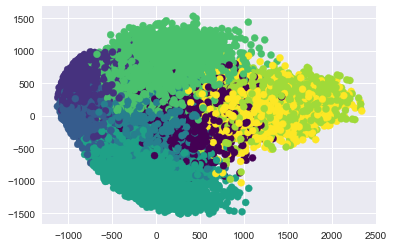

In [70]:
#Checking 8 cluster plot
k_mystery = KMeans(n_clusters=8)
k_mystery.fit(mystery)
mystery_labels = k_mystery.predict(mystery)
mystery_centers = k_mystery.cluster_centers_

pca = PCA(n_components = 2)
pca.fit(mystery)
trans_mystery = pca.transform(mystery)
trans_mystery.shape

plt.scatter(trans_mystery[:, 0], trans_mystery[:, 1], c=mystery_labels, s=50, cmap='viridis');

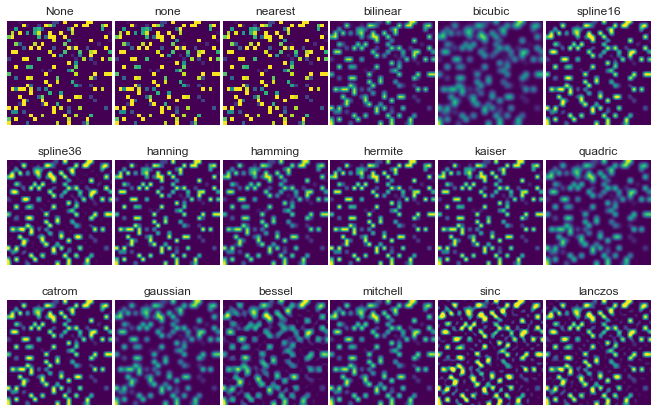

In [71]:
#Attempting to visualize individual examples with various interpolation methods
x=[]
y=0
while y <= 100:
    x.append(mystery[y].reshape(28,28))
    y = y + 1

    
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9.3, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.05)

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(x[1], interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

Based on the results above and any other analysis you wish to include, discuss how many clusters you see in the data.

I can clearly see 5 clusters in the data. 6+ clusters shows a lot of overlap of data points, while below 5 looks ok but some clusters look like they are a bit large and should be split into 2 clusters. 

(any additional code supporting your assertion on the number of clusters may be included below)

In [72]:
##### YOUR (OPTIONAL) CODE HERE #######

[2 Marks]
# Bonus

What is the mystery data in part 2? Show this in markdown and code below.

EXPLANATION HERE, code goes below.
I am not sure. I think it is definitely pixel values, split into 28/28 images. I also think it could be R-G-B images that need to be overlayed on top of each other to produce a realistic image.

In [73]:
##### YOUR (OPTIONAL) CODE HERE #######

[10 Marks]
# CP 8318 Questions

Describe how you might implement a solution to recommend new movies to a user based on their existing preferences or ratings from Part 1.

YOUR EXPLANATION HERE, provide an example for one user id below.

You could recommend movies similar to a movie the user liked based off the plot-summary. I will use term frequency-inverse document frequency which is built into the sklearn library:

In [74]:
##### YOUR CODE HERE #######
from sklearn.feature_extraction.text import TfidfVectorizer

#Importing the data
metadata_2=pd.read_csv('movies_metadata.csv', low_memory=False)
metadata_2 = metadata_2[['title', 'overview']]

#Removing all 'stop words' such as "the", "a" and replacing NaN with empty strings
tfidf = TfidfVectorizer(stop_words='english')
metadata_2['overview'] = metadata_2['overview'].fillna('')

#Construct the tfidf matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(metadata_2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape #----> gives (45466, 75827) : there are 75827 unique words to describe 45466 movies!!!

(45466, 75827)

I will use the cosine similarity as the distance metric between movies. It is defined as:

cosine(x,y) = (x.y.T)/(||x||.||y||)

This is just the normalized dot-product between x and y, so we can use linear_kernal. Then the goal will be to return the top 8 most similar movies based off of the cosine similarity matrix. 

In [75]:
from sklearn.metrics.pairwise import linear_kernel

#The cosine similarity matrix
cosine = linear_kernel(tfidf_matrix, tfidf_matrix)

In [76]:
#Creating indices
indices = pd.Series(metadata_2.index, index=metadata_2['title']).drop_duplicates()

In [77]:
def recommend_a_movie(title, cosine_similarity=cosine):
    #Locate index of that movie
    index = indices[title]
    
    #Return list of cosine similarity scores for the given index and then sort them
    similarity = list(enumerate(cosine[index]))
    similarity = sorted(similarity, key=lambda x: x[1], reverse=True)
    
    #Return list of top 8 movies while ignoring the first because it is the movie
    similarity = similarity[1:9]
    
    #Returning the indice with the movie
    movie_indices = [i[0] for i in similarity]
    return metadata_2['title'].iloc[movie_indices]


In [78]:
#Say the person enjoyed Jumanji:
recommend_a_movie('Jumanji')

21633         Table No. 21
45253                 Quiz
41573         Snowed Under
35509             The Mend
44376    Liar Game: Reborn
17223       The Dark Angel
8801               Quintet
6166             Brainscan
Name: title, dtype: object

In [79]:
#Another movie:
recommend_a_movie('Grumpier Old Men')

9207     An Extremely Goofy Movie
35575                         Max
443                      Fearless
235                 A Goofy Movie
4101                Heartbreakers
24576               The Guardians
31705        The Phantom of Paris
1617                         Bent
Name: title, dtype: object

This recommender system is ok, but not optimal by any means. It will return movies with similar plots and themes (Toy Story will recommend all other Toy Story movies regardless of popularity or vote average). It could be improved by using more features during the recommendation process and weighting the plot TD-IDF recommendation with similar genres, high popularities, or the same director as the input movie for example. 